
## Semana 13: Análisis exploratorio de datos con PANDAS y NUMPY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Esta clase será trabajada mediante la respuesta a algunos ejercicios planteados a continuación. Para ello, trabajaremos con un conjunto de datos que podemos cargar ejecutando las siguientes líneas de código.

In [2]:
import seaborn as sns

data = sns.load_dataset("penguins").dropna().values
df = pd.DataFrame(data, columns=["especie", "isla", "longitud_pico (mm)", "profundidad_pico (mm)", "longitud_aleta (mm)", "masa_corporal (g)", "genero"])
df

,especie,isla,longitud_pico (mm),profundidad_pico (mm),longitud_aleta (mm),masa_corporal (g),genero
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Esto cargará un dataframe (df), usando la librería seaborn, con algunas características morfológicas y geográficas de diferentes especies de pingüinos. Las colujmnas contienen los siguientes datos:

```
[especie, isla, longitud del pico, profundidad del pico, longitud de la aleta, masa corporal, genero]
```

Con estos datos, escriba las líneas de código con las que responda a las siguientes preguntas:



1.   ¿Cuáles son las profundidades del pico máxima y mínima de los pinguinos de la isla Torgersen?

2.    ¿De qué isla, especie y género es el pingüino con la mayor masa corporal?
       **Ayuda:** utilice la función `argmax()`

3.   ¿Cuál es la masa corporal media de los pinguinos macho que no son de la especie Gentoo?

4.   Grafique la distribución de la longitud del pico. Añada el valor medio y la desviación estándar en el título de la figura. **Ayuda:** utilice la funcion `hist()`

5.   ¿Cuáles son las islas y especies presentes en el conjunto de datos? ¿Con qué frecuencia aparecen? Grafique la distribución de la masa corporal para los pingüinos.




  



1.   ¿Cuáles son las profundidades del pico máxima y mínima de los pinguinos de la isla Torgersen?

In [3]:
#Se crea un nuevo dataframe que contiene solo los valores de df
# que cumplen la condicion de contener la cadena "Torgensen" en la columna
# "isla"
torgersen = df[df['isla'] == "Torgersen"]

# Imprime y calcula los valores máximo y mínimo de la columna 'profundidad_pico (mm)'
# en el dataframe torgensen.

print("Máxima logitud del pico:", torgersen['profundidad_pico (mm)'].max(), 'mm')
print("Mínima logitud del pico:", torgersen['profundidad_pico (mm)'].min(), 'mm')

Máxima logitud del pico: 21.5 mm
Mínima logitud del pico: 15.9 mm


In [4]:
#Usando el método loc, seleccionamos solo los elementos de la columna  'profundidad_pico (mm)'
# que cumplen la consición df.isla == "Torgersen". A esos les calculamos el máximo
# con .max()

#¿Cómo funciona iloc?

print("Máxima logitud del pico:", df.loc[df.isla == "Torgersen", 'profundidad_pico (mm)'].max(), 'mm')
print("Mínima logitud del pico:", df.loc[df.isla == "Torgersen", 'profundidad_pico (mm)'].min(), 'mm')

Máxima logitud del pico: 21.5 mm
Mínima logitud del pico: 15.9 mm


2.    ¿De qué isla, especie y género es el pingüino con la mayor masa corporal?
       **Ayuda:** utilice la función `argmax()`

In [5]:
# Usando numpy
#busca el índice con el valor máximo del dataframe df, buscando en todos los valores
# de la columna masa_corporal (g).
id_max = np.argmax(df['masa_corporal (g)'])

#con pandas
# selecciona el elemento de df con índice id_max, tomando las columnas
#  isla, especie y genero
df.loc[id_max, ['isla', 'especie', 'genero']]

isla       Biscoe
especie    Gentoo
genero       Male
Name: 231, dtype: object

3. ¿Cuál es la masa corporal media de los pinguinos macho que no son de la especie Gentoo?

In [6]:
# pandas

df.loc[(df.genero == "Male") & (df.especie != "Gentoo") , "masa_corporal (g)"].mean()

4010.2803738317757

4.   Grafique la distribución de la longitud del pico. Calcule el valor medio y la desviación estándar en el título de la figura.

In [7]:
# Calculemos la desviación estándar.

desviacion = df['longitud_pico (mm)'].std()
media = df['longitud_pico (mm)'].mean()

print("Desviación estándar:", desviacion, 'mm')
print("Media:", media, 'mm')

Desviación estándar: 5.468668342647559 mm
Media: 43.992792792792805 mm


<AxesSubplot:title={'center':'Histograma longitud pico (mm) '}, ylabel='Frequency'>

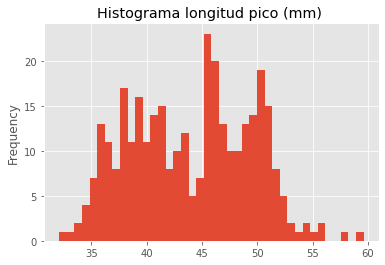

In [8]:
df['longitud_pico (mm)'].plot(kind="hist", bins=40, title= 'Histograma longitud pico (mm) ' )

5.   ¿Cuáles son las islas y especies presentes en el conjunto de datos? ¿Con qué frecuencia aparecen? Grafique la distribución de la masa.

In [9]:
df.isla.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: isla, dtype: int64

In [10]:
# porcentajes
df.isla.value_counts(normalize=True)

Biscoe       0.489489
Dream        0.369369
Torgersen    0.141141
Name: isla, dtype: float64

<AxesSubplot:ylabel='Frequency'>

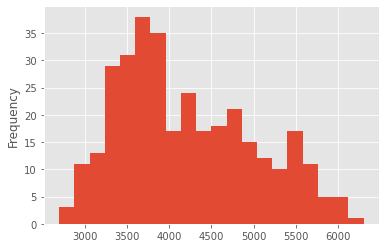

In [11]:
df['masa_corporal (g)'].plot.hist( bins = 20)